# Lab 9

In [1]:
#For colored cells, currently blue cells, black text 
#https://stackoverflow.com/questions/18024769/adding-custom-styled-paragraphs-in-markdown-cells
from IPython.core.display import HTML
def css_styling():
    styles = open("style.css", "r").read()
    return HTML(styles)
css_styling()

<div class=answer>
*This should be a blue cell with black font if you set the filepath correctly*</font>
<div/>

## Lab Exercises 

* [CUT] Newman 8.2 - The Lotka-Volterra equations 
* [CUT] Newman 8.3 - The Lorenz equations
* Newman 8.4 - The non-linear pendulum
* Newman 8.5 - The driven pendulum

*The cuts are chosen so we don't need to work with coupled equations yet.  Instead we will focus on the pendulum problem.  Keep those additional problems in mind for a Final Project.*

Do Newman's Exercises 8.4 and 8.5 in a lab format.  This means your work needs to begin with a introduction to the problem.  Explain the basic physics as in Example 8.6 (choose your own words).  Explain the graphs clearly.

Do these in a separate notebook so it can be graded separately from Weekly Session 9.

In order to solve Newman 8.4-8.5, you will need to solve a system of coupled ODE's one way, or another.  Here is my code to do so

In [2]:
import numpy as np
import pylab as plt
%matplotlib inline

def solve_coupled(f,n,r0,interval,steps,*args,order=1):
    """ Solve system of coupled ODEs by Euler or Runge-Kutta methods,
    with fixed number of steps.

    f: vector function giving ODE as r'=f(t,r)
       Should return numpy array, so array arithmetic works.
       Note opposite argument order to Newman.
       We put independent variable first.
    n: number of spatial dimensions (i.e., dependent variables)
    r0: vector initial value
    interval: tuple region (a,b) on which to solve ODE
    steps: number of steps
    order: order of solution method (1 for Euler, 2 or 4 for Runge-Kutta) 
    
    Returns points (t,r1,...,rn), as (steps+1)x(n+1) numpy array.
    """

    # set up solution mesh
    # points will be indexed 0..steps
    (a,b) = interval  # endpoints
    h = (b-a)/steps  # step size
    points = np.zeros((steps+1,n+1))

    # set up initial point
    t = a    # current point t value
    r = r0   # current point r value
    points[0,0] = t
    points[0,1:] = r
    ## # alternatively:
    ## for i in range(n):
    ##     points[0,i+1] = r[i]

    for i in range(1,steps+1):

        # evaluate new point
        t_new = t + h
        if (order == 1):
            # Euler
            r_new = r + h * f(t,r,*args)
        elif (order == 2):
            # second-order Runge-Kutta
            # Newman (8.13)
            k1 = h * f(t,r,*args)
            k2 = h * f(t+1/2*h,r+1/2*k1,*args)
            r_new = r + k2
        elif (order == 4):
            # fourth-order Runge-Kutta
            # Newman (8.17)
            k1 = h * f(t,r,*args)
            k2 = h * f(t+1/2*h,r+1/2*k1,*args)
            k3 = h * f(t+1/2*h,r+1/2*k2,*args)
            k4 = h * f(t+h,r+k3,*args)
            r_new = r + 1/6*(k1+2*k2+2*k3+k4)

        # save new point
        (t,r) = (t_new,r_new)
        points[i,0] = t
        points[i,1:] = r

    return points



In [4]:
################################################################
# repeat as 1-dim vector to test vector machinery
################################################################
def f_Newman_8_7_vec(t,r):
    (x,) = r
    r_prime = [-x**3+np.sin(t)]
    #print ("t {}, x {}, rp {}".format(t,x,r_prime))
    return np.array(r_prime)

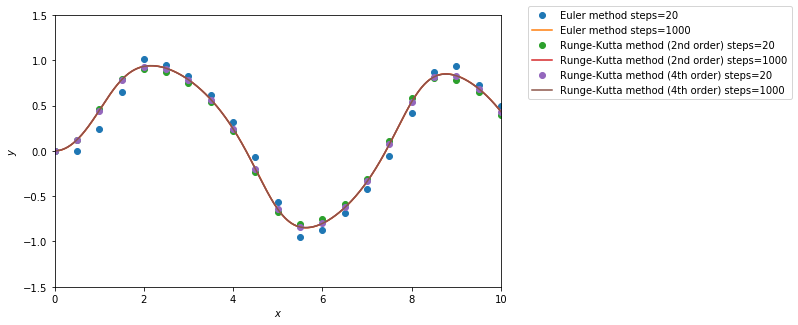

In [37]:
interval = (0.,10.)
r0 = [0.]

#set up plot
#plot the step size vs. error
plt.figure(figsize=(8, 5))
ax = plt.subplot(111)

#more efficient way to do this
i=0
        
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_xlim(*interval)
ax.set_ylim(-1.5,1.5)


for order in [1,2,4]:
    # obtain solutions with different step sizes
    for steps in [20,1000]:  # Newman used [10,20,50,100]
        
        results = []    # to hold results with different step sizes

        solution = solve_coupled(f_Newman_8_7_vec,1,r0,interval,steps,order=order)
        results.append(solution)

        # plot results

        if (order == 1):
            label = "Euler method"
        elif (order == 2):
            label = "Runge-Kutta method (2nd order)"
        elif (order == 4):
            label = "Runge-Kutta method (4th order)"
            
        if steps == 20:
            style='o'
        else:
            style='-'

        label = label + " steps=%d"%(steps)
        #for solution in results:
        plt.plot(solution[:,0],solution[:,1],style,label=label)
            
plt.legend(bbox_to_anchor=(1.05, 1.05))
plt.show()


            

# Exercise 8.4

It is common in physics to model the behavior of the pendulum as though it followed a linear differential equation that can be solved exactly. Real pendulums, however, are nonlinear, so instead of approximating their behavior with an exact solution to a linear differential equation we can do a numerical solution to a nonlinear differential equation. 

We begin by defining the pendulum as frictionless, with an arm length of $l$, and bob of mass $m$. The acceleration of the mass relative to the angle $\theta$ of displacement from the vertical is $l d^2\theta/dt^2$. Due to gravity, the mass has a restoring force of $mg \sin (\theta)$, where $g = 9.81 m/s^2$. Using Newton's second law we obtain the equation of motion as

\begin{equation*}
ml \frac{d^2\theta}{dt^2} = -mg \sin (\theta).
\end{equation*}'

We can rearrange this equation to give

\begin{equation*}
\frac{d^2\theta}{dt^2} = - \frac{g}{l} \sin (\theta).
\end{equation*}

To solve this second-order differential equation we can break it up into two first-order equations. We do this by first defining the value of $\omega$ as

\begin{equation*}
\frac{d\theta}{dt} = \omega,
\end{equation*}

which consequently gives us

\begin{equation*}
\frac{d\omega}{dt} = - \frac{g}{l} \sin (\theta).
\end{equation*}

As a result of having two first-order differential equations we can define the vector $\vec{r} = (\theta, \omega)$ to allow for the use of fourth-order Runge-Kutta method in vector form. Below is the are a few different solutions with different initial conditions using the Runge-Kutta method and the equations defined above.



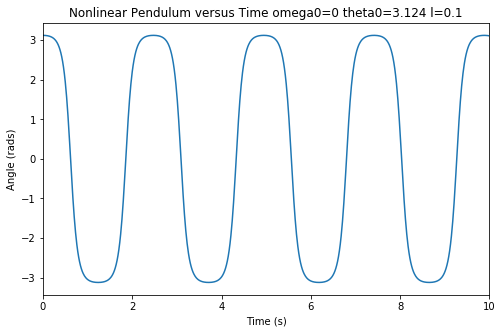

In [4]:
def f (t, r):
    """
    Description: calculates the values of the differential equations describe in Newman exercise 8.4
    
    Parameters:t - float
               r - touple (theta, omega) which are (float, float)
    
    Returned:numpy array [float, float]
    """
    #r = (theta, omega)
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g / l) * np.sin (theta)
    
    return np.array ([ftheta, fomega], float)


#a) 
#solve equ 8.45 and 8.46 w/ 4-order Runge-Kutta
g = 9.81 #m/s
l = 0.1 #m
theta0 = 179 / 180 * np.pi #rads
omega0 = 0
numIndepVars = 2
r0 = (theta0, omega0)
interval = (0, 10) #time
steps = 1000
order = 4

solution = solve_coupled (f, numIndepVars, r0, interval, steps, order = order)

#set up plot
plt.figure(figsize=(8, 5))
ax = plt.subplot(111)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Angle (rads)")
ax.set_xlim(*interval)
ax.set_title ("Nonlinear Pendulum versus Time omega0={} theta0={:.4} l={}".format (omega0, theta0, l))

plt.plot(solution[:,0],solution[:,1])
plt.show ()

This graph shows the angle a pendulum swings through as a function of time. The x-axis is the time the pendulum is swinging and ranges from 0 to 10 seconds. The y-axis is the angle that the pendulum swings through and ranges from -4 to 4 radians. The function is oscillatory and shown in blue. The function begin at $179\pi/180$ radians where its slope is nearly flat. The slope then becomes nearly vertical downward. At around 1 second the function begins to flatten off and then become increasing. The function then increases and continues in this manner throughout the graph.

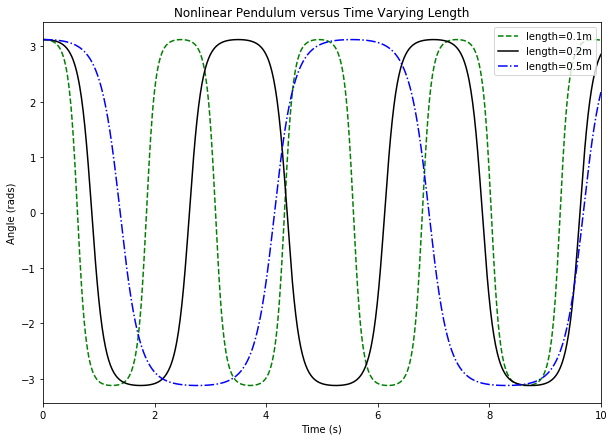

In [12]:
#b instead of animating it, vary values

styles = ["--g", "-k", "-.b"]
numIndepVars = 2
interval = (0, 10) #time


#vary pendulum length
g = 9.81 #m/s
lengths = [0.1, 0.2, 0.5] #m
theta0 = 179 / 180 * np.pi #rads
omega0 = 0
r0 = (theta0, omega0)


#set up plot
plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Angle (rads)")
ax.set_xlim(*interval)
ax.set_title ("Nonlinear Pendulum versus Time Varying Length")

for i in range (len (styles)):
    l = lengths[i]
    solution = solve_coupled (f, numIndepVars, r0, interval, steps, order = order)
    plt.plot(solution[:,0],solution[:,1], styles[i], label="length={}m".format (l))
    
plt.legend (loc=1)
plt.show ()

This graph shows angle swung by a pendulum over a 10s time period. The x-axis is the time the pendulum is allowed to swing and ranges from 0 to 10s. The y-axis is the angle of the pendulum swing and ranges from a little under -3 to a little over 3 radians. The case of the arm length equaling 0.1m is shown by a dashed green line and oscillates in value between just under $\pi$ to just above $-\pi$. This is also true for the larger lengths of 0.2 and 0.5m, shown by a solid black and a dashed blue lines respectively. The larger lengths have longer periods between oscillations.


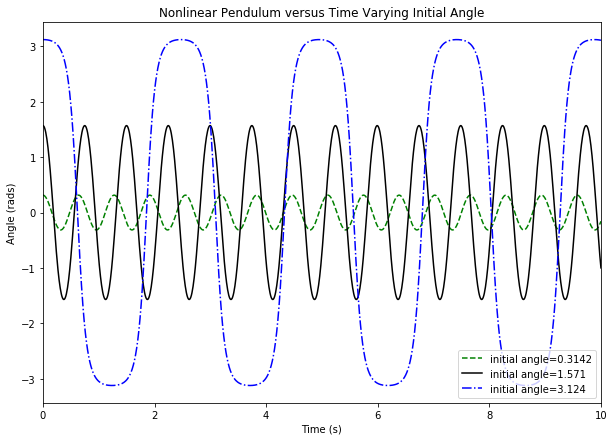

In [13]:
#vary pendulum initial angle
g = 9.81 #m/s
l = 0.1 #m
theta0 = [0.1 * np.pi, 0.5 * np.pi, 179 / 180 * np.pi] #rads
omega0 = 0



#set up plot
plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Angle (rads)")
ax.set_xlim(*interval)
ax.set_title ("Nonlinear Pendulum versus Time Varying Initial Angle")

for i in range (len (styles)):
    r0 = (theta0[i], omega0)
    solution = solve_coupled (f, numIndepVars, r0, interval, steps, order = order)
    plt.plot(solution[:,0],solution[:,1], styles[i], label="initial angle={:.4}".format (theta0[i]))
    
plt.legend ()
plt.show ()

The x-axis of this figure is time varying from 0 to 10s. The y-axis is the angle through which a pendulum swings and ranges from -4 to 4 radians. The green dashed line is for the case where the starting angle is 0.3142 radians. This line oscillates between this starting angle and -0.3142 radians. The solid black line is for the angle 1.571 radians. This line also oscillates between the starting angle and the negative value of the starting angle. The period between the oscillation is less than the smaller angled case. The dashed blue line is for the starting angle of 3.124 radians. This line has the largest period of oscillation.


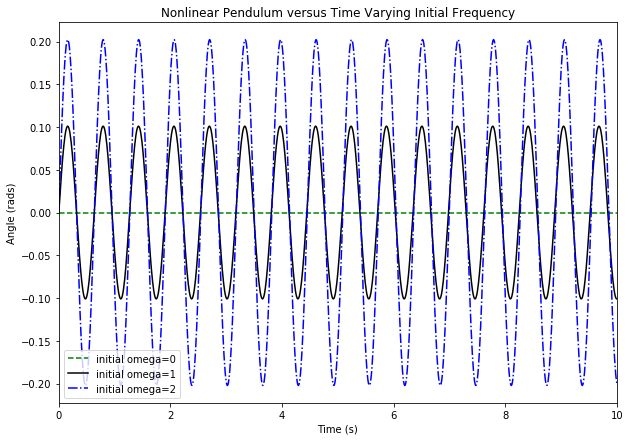

In [16]:
#vary pendulum initial omega
g = 9.81 #m/s
l = 0.1 #m
theta0 = 0 #rads
omega0 = [0, 1, 2]



#set up plot
plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Angle (rads)")
ax.set_xlim(*interval)
ax.set_title ("Nonlinear Pendulum versus Time Varying Initial Frequency")

for i in range (len (styles)):
    r0 = (theta0, omega0[i])
    solution = solve_coupled (f, numIndepVars, r0, interval, steps, order = order)
    plt.plot(solution[:,0],solution[:,1], styles[i], label="initial omega={}".format (omega0[i]))
    
plt.legend ()
plt.show ()

The x-axis shows the time a pendulum with an initial angle from the vertical of zero is allowed to swing. The x-axis ranges from 0 to 10s. The y-axis ranges from -0.20 to 0.20 radians. The dashed green line shows a pendulum with an initial omega value of 0 radians/second. This line is flat which is consistent of a pendulum that is initially at rest and no initial potential energy. The solid black line shows a pendulum with an initial omega of 1 radian/second. This line oscillates between 0.10 radians and -0.10 radians. The dashed blue line shows a pendulum with an initial omega of 2 radian/second. This line oscillates between 0.20 radians and -0.20 radians. The pendulums with initial omega values of 1 and 2 radians/second both oscillate with the same period. 


# Exercise 8.5

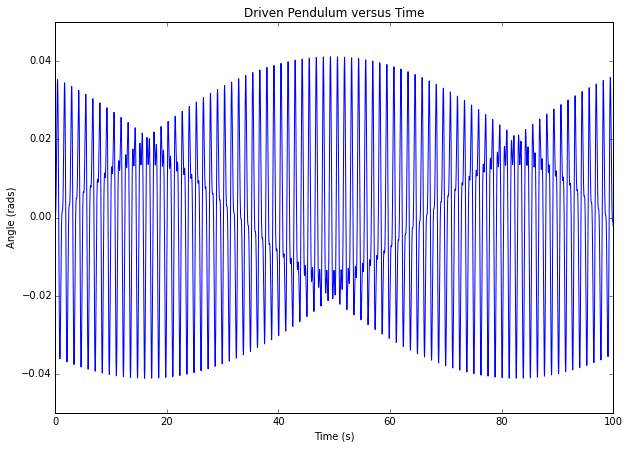

In [3]:
def f (t, r):
    """
    Description:
    
    Parameters:
    
    Returned:
    """
    #r = (theta, omega)
    theta = r[0]
    omega = r[1]
    
    ftheta = omega
    fomega = -(g / l) * np.sin (theta) + C * np.cos (theta) * np.sin (PSI * t)
    
    return np.array ([ftheta, fomega], float)

C = 2 #1/sec^2
PSI = 5 #1/sec
l = 0.1 #m
g = 9.81 #m/sec^2
numIndepVars = 2
interval = (0, 100) #sec
steps = 10000
order = 4
theta0 = 0
omega0 = 0
r0 = (theta0, omega0)

#set up plot
plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Angle (rads)")
ax.set_xlim(*interval)
ax.set_title ("Driven Pendulum versus Time")

solution = solve_coupled (f, numIndepVars, r0, interval, steps, order = order)

plt.plot(solution[:,0],solution[:,1])

plt.show ()

This graph shows a pendulum oscillating while being driven by an oscillatory force. The x-axis is time from 0 to 100s. The y-axis is the angle through which the pendulum oscillates and ranges from -0.04 radians to 0.04 radians. The line is shown in blue. The maximum and minimum values through which the pendulum oscillates fluctuates in an oscillatory manner itself. This is a beating effect caused by the difference between the frequency at which the driving force oscillates and the frequency of the pendulum oscillates.


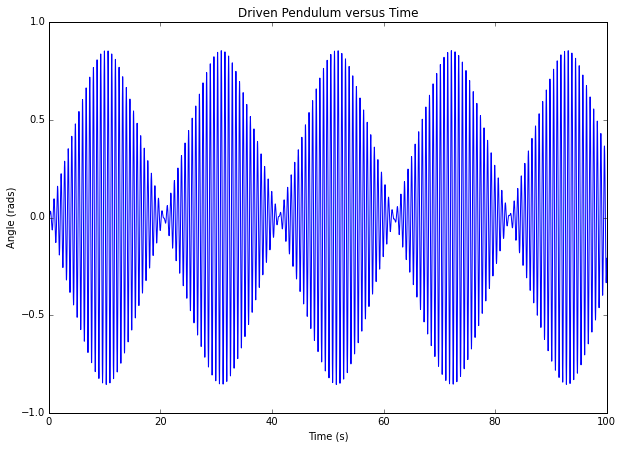

In [8]:

PSI = np.sqrt(g / l) #1/sec
C = 2 #1/sec^2
l = 0.1 #m
g = 9.81 #m/sec^2
numIndepVars = 2
interval = (0, 100) #sec
steps = 10000
order = 4
theta0 = 0
omega0 = 0
r0 = (theta0, omega0)

#set up plot
plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Angle (rads)")
ax.set_xlim(*interval)
ax.set_title ("Driven Pendulum versus Time")

solution = solve_coupled (f, numIndepVars, r0, interval, steps, order = order)

plt.plot(solution[:,0],solution[:,1])

plt.show ()

This graph shows an oscilator being driven by an oscilating force. The x-axis is the time of oscilation this ranges from 0 to 100s. The y-axis is the angle in which the pendulum oscilates through and ranges from -1 to 1 radians. The line is shown in blue. 